* Todos los años
* Correr random forest
* lazzo?
* Objectivo 8%

In [1]:
import tensorflow as tf

In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import missingno
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from pprint import pprint
%matplotlib inline

In [3]:
from sklearn.ensemble import RandomForestRegressor

# Data Loading
we load the dataset and do some pre-processing

In [4]:
fname = 'dataset.csv'
fpath = os.path.join(os.getcwd(), fname)
df = pd.read_csv(fpath, encoding='utf-8')

df.sort_values("year", inplace = True, ascending=False)
df = df.drop_duplicates(subset=['cod_com', 'cod_mz', 'cod_pr'], keep='first')

time_range = []
for year in range(2009, 2019):
    for semester in range(1, 3):
        time_range.append(f"{semester}-{year}")

df = df[df.periodo.isin(time_range)]

df = df[df['precio_uf']>5000]
df = df[df['precio_uf']<30000]

# for now, we are going to take in consideration just a single time period & houses only
#df = df[df['periodo']=='2-2018']
df = df[df['tipo'] == 'Casa']
#df.apply(lambda x: x['periodo'].split('-')[1], axis=1)['periodo']
#df = df[df['cod_destino'] == 'H']  # H: Habitacional
df['periodo'] = df['periodo'].apply(lambda x: int(x.split('-')[1]))

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year_mas_antiguo,35495.0,1.993340e+03,2.274906e+01,1.543000e+03,1.975000e+03,2.002000e+03,2.012000e+03,2.019000e+03
year_construccion_mas_reciente,35291.0,1.997075e+03,1.947901e+01,1.886000e+03,1.987000e+03,2.004000e+03,2.012000e+03,2.018000e+03
calidad_ponderada,35291.0,2.556994e+00,6.078163e-01,5.000000e-01,2.000000e+00,3.000000e+00,3.000000e+00,5.000000e+00
cod_com,35537.0,1.493745e+04,4.438430e+02,1.310100e+04,1.510500e+04,1.512800e+04,1.516000e+04,1.640100e+04
cod_mz,35537.0,3.531903e+03,2.660693e+03,1.000000e+00,1.538000e+03,2.803000e+03,4.413000e+03,1.550100e+04
cod_pr,35537.0,8.883595e+01,1.304097e+02,1.000000e+00,1.400000e+01,3.600000e+01,1.070000e+02,9.960000e+02
periodo,35537.0,2.014330e+03,2.790208e+00,2.009000e+03,2.012000e+03,2.015000e+03,2.017000e+03,2.018000e+03
m_const,35537.0,1.761559e+02,9.184450e+01,0.000000e+00,1.340000e+02,1.460000e+02,2.000000e+02,6.770000e+03
m_terreno,35537.0,4.404361e+02,1.161660e+03,0.000000e+00,0.000000e+00,3.000000e+02,5.200000e+02,1.000000e+05
m_terraza,35537.0,2.898388e-02,2.948321e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.320000e+02


## Data Cleansing

### NaN Removal

In [6]:
df.isna().sum()[df.isna().sum()>0]  # These are the variables that contain NaN values

year_mas_antiguo                     42
year_construccion_mas_reciente      246
cod_material_predominante           251
calidad_ponderada                   246
año_const                            27
latitud                              29
longitud                             29
nombre_zona_prc                    1148
cod_zona_prc                       1101
capa_prc                           1072
consec_sanitaria                    452
consec_electrica                    140
dist_rellenos_sanitarios             29
dist_vertederos_ilegales             29
construcciones_generales            246
galpones                          35188
complementarias                   31762
obras_civiles                     35537
sup_terreno                       14276
cod_zona_ine                        350
cod_distrito_ine                     29
cod_com_bc                        21793
cod_mz_bc                         21793
cod_pr_bc                         21793
avaluo_fiscal_bc_clp              21845


In [7]:
df.drop('galpones', axis=1, inplace=True)
df.drop('obras_civiles', axis=1, inplace=True)
df.drop('sup_terreno', axis=1, inplace=True)
df.drop('complementarias', axis=1, inplace=True)

df.drop('cod_com_bc', axis=1, inplace=True)
df.drop('cod_mz_bc', axis=1, inplace=True)
df.drop('cod_pr_bc', axis=1, inplace=True)

# We fix the 'cod_material_predominante' using mode
material_type_mode = df['cod_material_predominante'].mode()[0]
df['cod_material_predominante'] = df['cod_material_predominante'].fillna(material_type_mode)
df = df.dropna()

### Remove Unnecessary Variables

In [8]:
df.drop('latitud', axis=1, inplace=True)
df.drop('longitud', axis=1, inplace=True)

df.drop('nombre_zona_prc', axis=1, inplace=True)
df.drop('cod_zona_prc', axis=1, inplace=True)
df.drop('capa_prc', axis=1, inplace=True)

df.drop('consec_electrica', axis=1, inplace=True)
df.drop('direccion_cbr', axis=1, inplace=True)
df.drop('direccion', axis=1, inplace=True)

df.drop('periodo_cbr', axis=1, inplace=True)
#df.drop('periodo', axis=1, inplace=True)

# As we are contemplating the same area we remove the following variables
df.drop('tipo', axis=1, inplace=True)
#df.drop('cod_com', axis=1, inplace=True)
df.drop('cod_pr', axis=1, inplace=True)
# cod_mz is kept, so we can evaluate in different blocks of the commune


df.drop('semestre', axis=1, inplace=True)
df.drop('semestre.1', axis=1, inplace=True)
df.drop('year', axis=1, inplace=True)
df.drop('year.1', axis=1, inplace=True)
df.drop('verificada', axis=1, inplace=True)
df.drop('año', axis=1, inplace=True)
df.drop('mes', axis=1, inplace=True)
df.drop('cruce_perfecto', axis=1, inplace=True)
df.drop('cod_com.1', axis=1, inplace=True)
df.drop('cod_mz.1', axis=1, inplace=True)
df.drop('cod_pr.1', axis=1, inplace=True)

In [9]:
pprint(df.columns)

Index(['year_mas_antiguo', 'year_construccion_mas_reciente',
       'cod_material_predominante', 'calidad_ponderada', 'cod_com', 'cod_mz',
       'periodo', 'm_const', 'm_terreno', 'm_terraza', 'año_const',
       'precio_uf', 'codigo_transaccion', 'tipo_transaccion',
       'avaluo_fiscal_clp', 'contrib_sem_clp', 'cod_destino',
       'avaluo_exento_clp', 'consec_sanitaria', 'dist_rellenos_sanitarios',
       'dist_vertederos_ilegales', 'construcciones_generales', 'cod_zona_ine',
       'cod_distrito_ine', 'avaluo_fiscal_bc_clp', 'porcentaje_co_propiedad',
       'posee_segundo_bc', 'colegio_1', 'colegio_2', 'colegio_3', 'colegio_4',
       'colegio_5', 'estab_1y2_snss', 'hospitales_privados',
       'hospitales_publicos', 'pdi', 'carabineros', 'metro',
       'paradero_transantiago', 'parque_urbano', 'mall', 'multitienda',
       'homecenter', 'supermercado', 'monumento_historico'],
      dtype='object')


### Correlation

<AxesSubplot:>

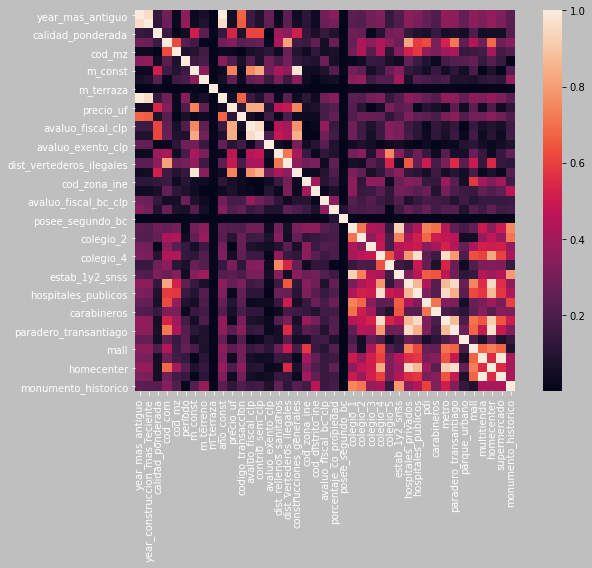

In [10]:
corrmat = df.corr().abs()
f, ax = plt.subplots(figsize=(10, 7))
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

f.patch.set_facecolor('#000000')
f.patch.set_alpha(0.25)

sn.heatmap(corrmat, square=True)

In [11]:
df.drop('m_terraza', axis=1, inplace=True)
df.drop('posee_segundo_bc', axis=1, inplace=True)
df.drop('year_mas_antiguo', axis=1, inplace=True)

### Discretization

In [12]:
msk = df.dtypes == np.object
# These are all columns that contain categorical information
categorical_variables = list(df.loc[:,msk].columns)
categorical_variables.append('cod_mz')
categorical_variables.append('cod_com')
#df.drop('cod_mz', axis=1, inplace=True)
categorical_variables

['cod_material_predominante',
 'tipo_transaccion',
 'cod_destino',
 'consec_sanitaria',
 'cod_mz',
 'cod_com']

In [13]:
columns_pre = df.columns
df = pd.get_dummies(df, columns=categorical_variables, drop_first= True)
columns_after = df.columns
dummy_variables = list(set(columns_after) - set(columns_pre))

### Normalization

In [14]:
if True:
    data_scaler = preprocessing.MinMaxScaler()
    data_scaler.fit(df)
    sdf = data_scaler.transform(df)
    df = pd.DataFrame(sdf, columns=df.columns)  # Add again the column names

# Model

## Features Selection

In [15]:
features = [
    'año_const',
    'm_const',
    'm_terreno',
    #'construcciones_generales',
    'avaluo_fiscal_clp',
    'calidad_ponderada',
    'colegio_1',
    'colegio_2',
    'hospitales_publicos',
    'hospitales_privados',
    'supermercado',
    'paradero_transantiago',
    'mall',
    'parque_urbano',
    #'multitienda',  # multitienda omitted because of collinearity
    'homecenter',
    'precio_uf',
]
features +=  dummy_variables
df = df[features]
#df = pd.read_excel('filtered.xlsx')
#df = df[df['precio_uf']>5000]
#df = df[df['precio_uf']<30000]

## Export Dataset

In [16]:
#df.to_csv('stata.csv', index=False)

## Separate Training & Validation Datasets

In [17]:
training_dataset = df.sample(frac=0.8, random_state=0)
validation_dataset = df.drop(training_dataset.index)

features_training = training_dataset.drop(columns=['precio_uf'])
features_validation = validation_dataset.drop(columns=['precio_uf'])

labels_training = training_dataset[['precio_uf']]
labels_validation = validation_dataset[['precio_uf']]

## Model

In [18]:
rf = RandomForestRegressor(n_estimators=1000, random_state=42)

In [19]:
rf.fit(features_training, labels_training)

c:\users\matias\pycharmprojects\tesis\venv\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(n_estimators=1000, random_state=42)

In [20]:
predictions = rf.predict(features_validation)

In [21]:
# Calculate the absolute errors
errors = abs(predictions - labels_validation.values)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'uf.')

Mean Absolute Error: 0.18 uf.


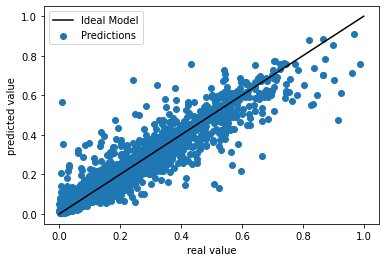

In [22]:
def plot_scatter(x, y):
    line = np.linspace(0, int(x.max())+1, 10)
    plt.scatter(x, y, label='Predictions')
    plt.plot(line, line, color='k', label='Ideal Model')
    plt.xlabel('real value')
    plt.ylabel('predicted value')
    plt.legend()

plot_scatter(labels_validation.values, predictions)